# importing modules

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Working with a real dataset

In [4]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
df[df['smoker'] == 'yes'].value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  21.660  0         yes     northeast  14283.45940    1
45   male    30.360  0         yes     southeast  62592.87309    1
46   male    42.350  3         yes     southeast  46151.12450    1
             30.495  3         yes     northwest  40720.55105    1
     female  35.530  0         yes     northeast  42111.66470    1
                                                                ..
31   male    29.810  0         yes     southeast  19350.36890    1
             34.390  3         yes     northwest  38746.35510    1
             36.300  2         yes     southwest  38711.00000    1
32   female  17.765  2         yes     northwest  32734.18630    1
64   male    36.960  2         yes     southeast  49577.66240    1
Name: count, Length: 274, dtype: int64

# Preprocessing

In [9]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [10]:
df['sex'] = df['sex'].astype(bool)
df['smoker'] = df['smoker'].astype(bool)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


In [11]:
region = pd.get_dummies(df['region'])
region

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [12]:
df = pd.concat([df, region], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,southwest,16884.92400,False,False,False,True
1,18,True,33.770,1,False,southeast,1725.55230,False,False,True,False
2,28,True,33.000,3,False,southeast,4449.46200,False,False,True,False
3,33,True,22.705,0,False,northwest,21984.47061,False,True,False,False
4,32,True,28.880,0,False,northwest,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,northwest,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,northeast,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,southeast,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,southwest,2007.94500,False,False,False,True


In [13]:
df.drop('region', axis = 1, inplace = True)

In [14]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,16884.92400,False,False,False,True
1,18,True,33.770,1,False,1725.55230,False,False,True,False
2,28,True,33.000,3,False,4449.46200,False,False,True,False
3,33,True,22.705,0,False,21984.47061,False,True,False,False
4,32,True,28.880,0,False,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,2007.94500,False,False,False,True


In [15]:
df.fillna(df.mean(), inplace=True)

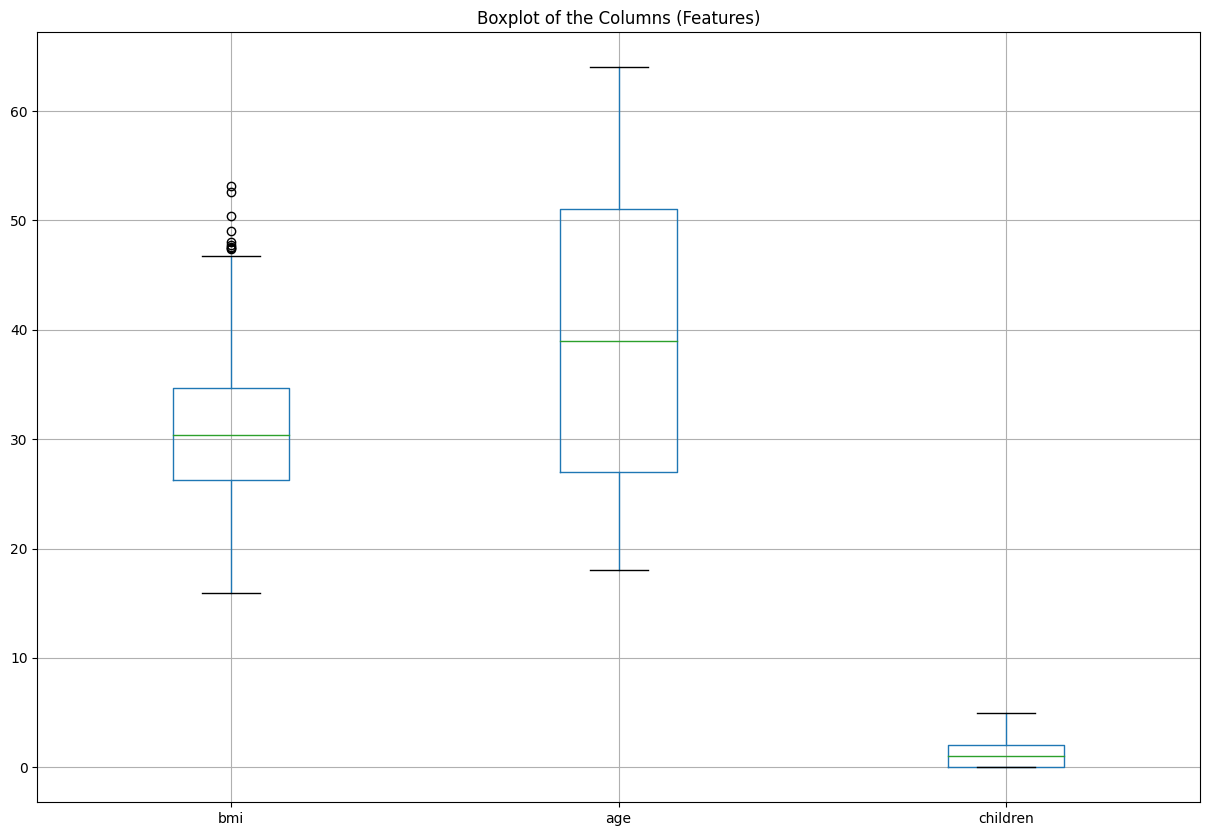

Total of 9 outliers detected. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [16]:
# Outlier detection

plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['bmi', 'age', 'children']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")

In [17]:
y = df['charges']
x = df.drop(columns='charges', axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=80)

In [20]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Coefficients of the variables in the sklearn:  [ 3577.78407213  -271.82219421  1672.74301326  1604.54942935
  7681.96621515  -211.17845959   370.1586321   1200.67150567
 -1462.43700544]


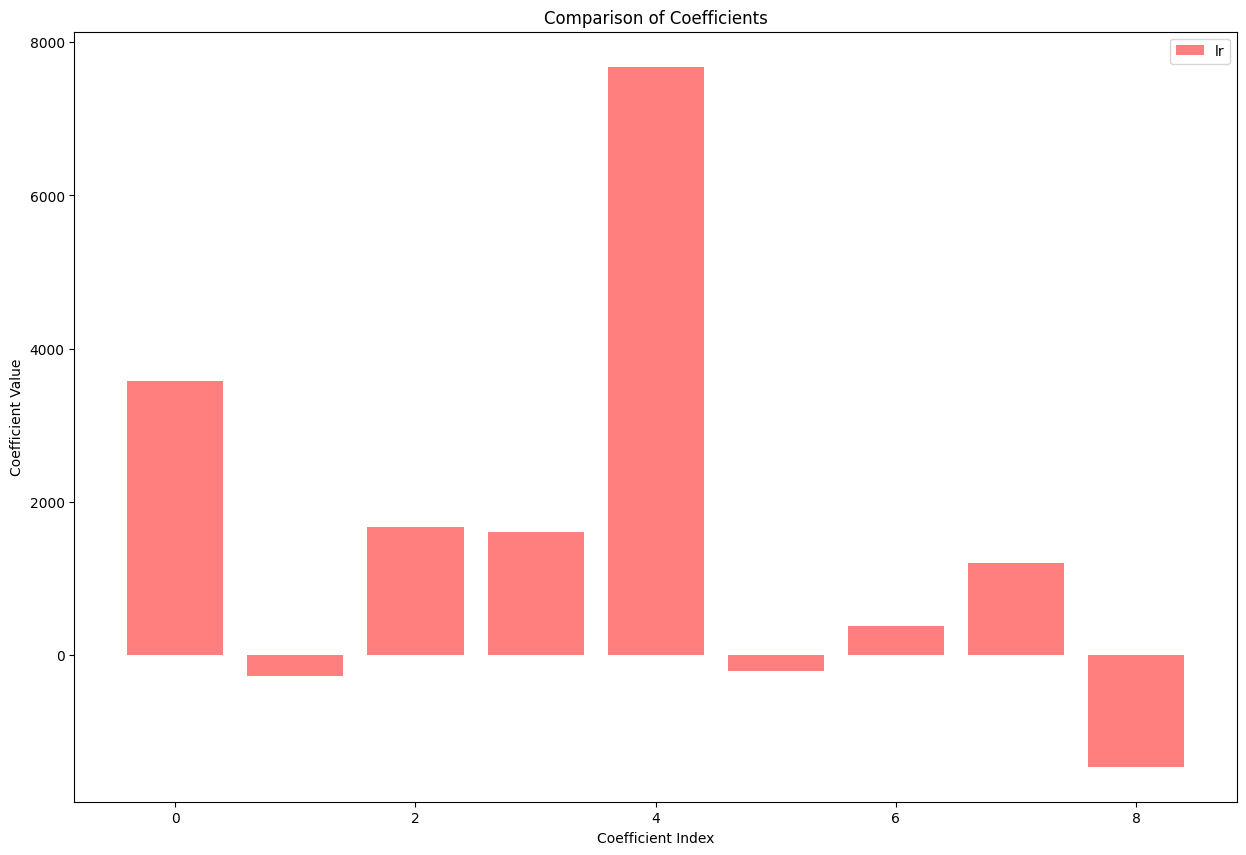

In [23]:
def visualize_coef(model, label, color):
    print("Coefficients of the variables in the sklearn: ", model.coef_)

    plt.figure(figsize=(15, 10))
    plt.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()
    
    plt.show()
    
visualize_coef(lr, "lr", "r")

In [24]:
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

print("R² score on the training dataset: ", r2)
print("MSE on the training dataset: ", mse)

R² score on the training dataset:  0.6884630842964932
MSE on the training dataset:  37030569.5226856


# Regularization

## L1

In [25]:

lasso_lr = Lasso(alpha=0.5)
lasso_lr.fit(x_train, y_train)


lasso_lr_low_alpha = Lasso(alpha=0.1)
lasso_lr_low_alpha.fit(x_train, y_train)


lasso_lr_high_alpha = Lasso(alpha=2)
lasso_lr_high_alpha.fit(x_train, y_train)

Lasso(alpha=2)

Coefficients of the variables in the sklearn:  [ 3577.44764007  -271.13068857  1672.25685533  1604.05053752
  7681.32258652   -39.00375606   524.57258227  1363.28959063
 -1313.69153061]


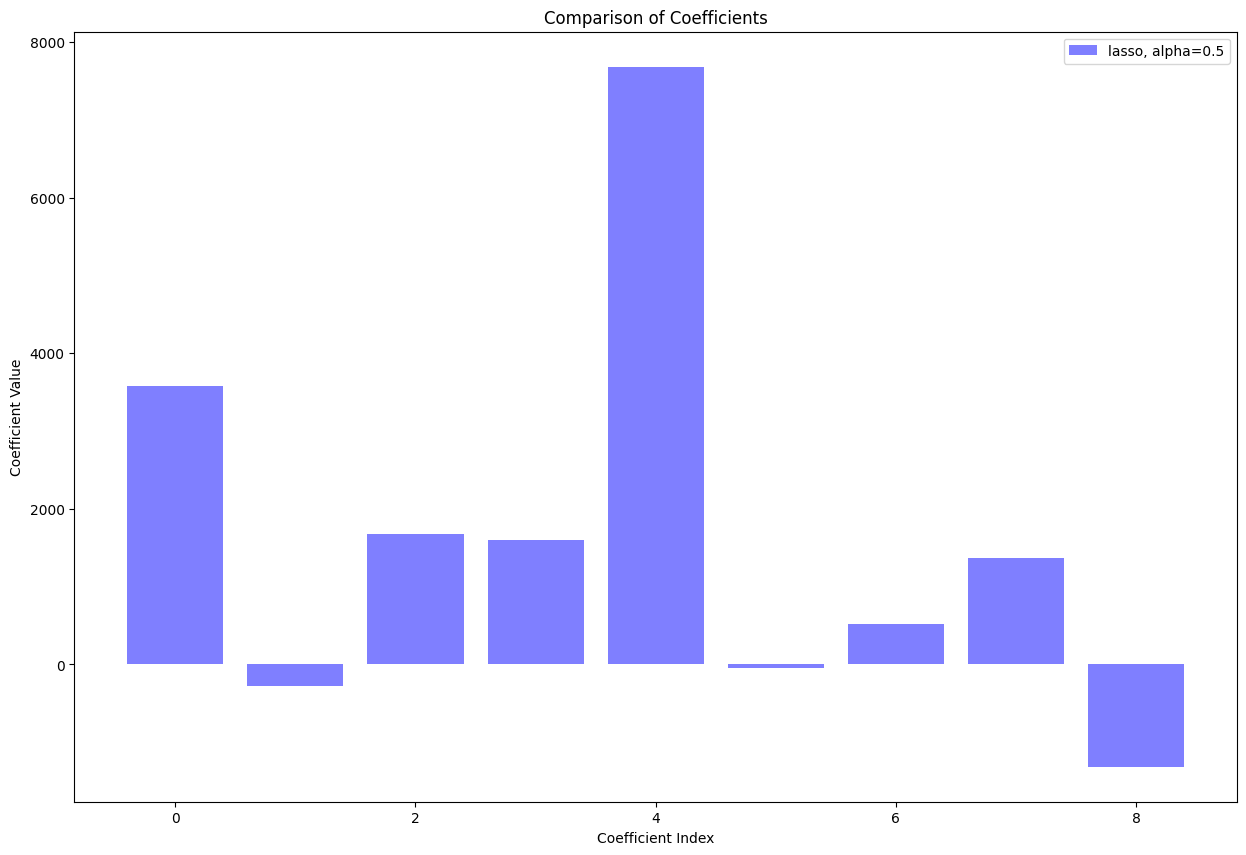

Coefficients of the variables in the sklearn:  [ 3577.72017573  -271.68840059  1672.64542424  1604.44903115
  7681.83640809   -39.34101565   524.82900608  1363.62774662
 -1314.11212602]


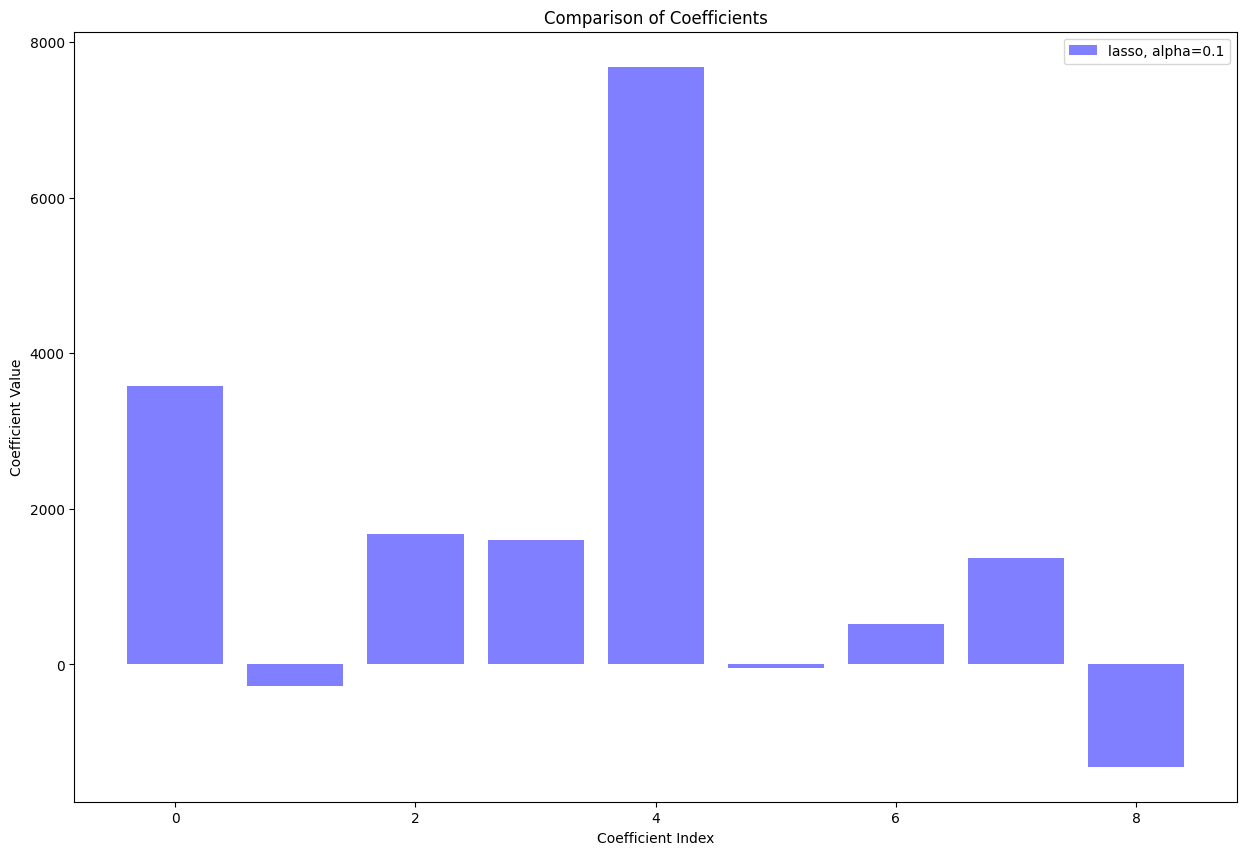

Coefficients of the variables in the sklearn:  [ 3576.4442209   -269.05707591  1670.82323938  1602.53519133
  7679.40627339   -37.75382497   523.59183583  1362.0092295
 -1312.12607795]


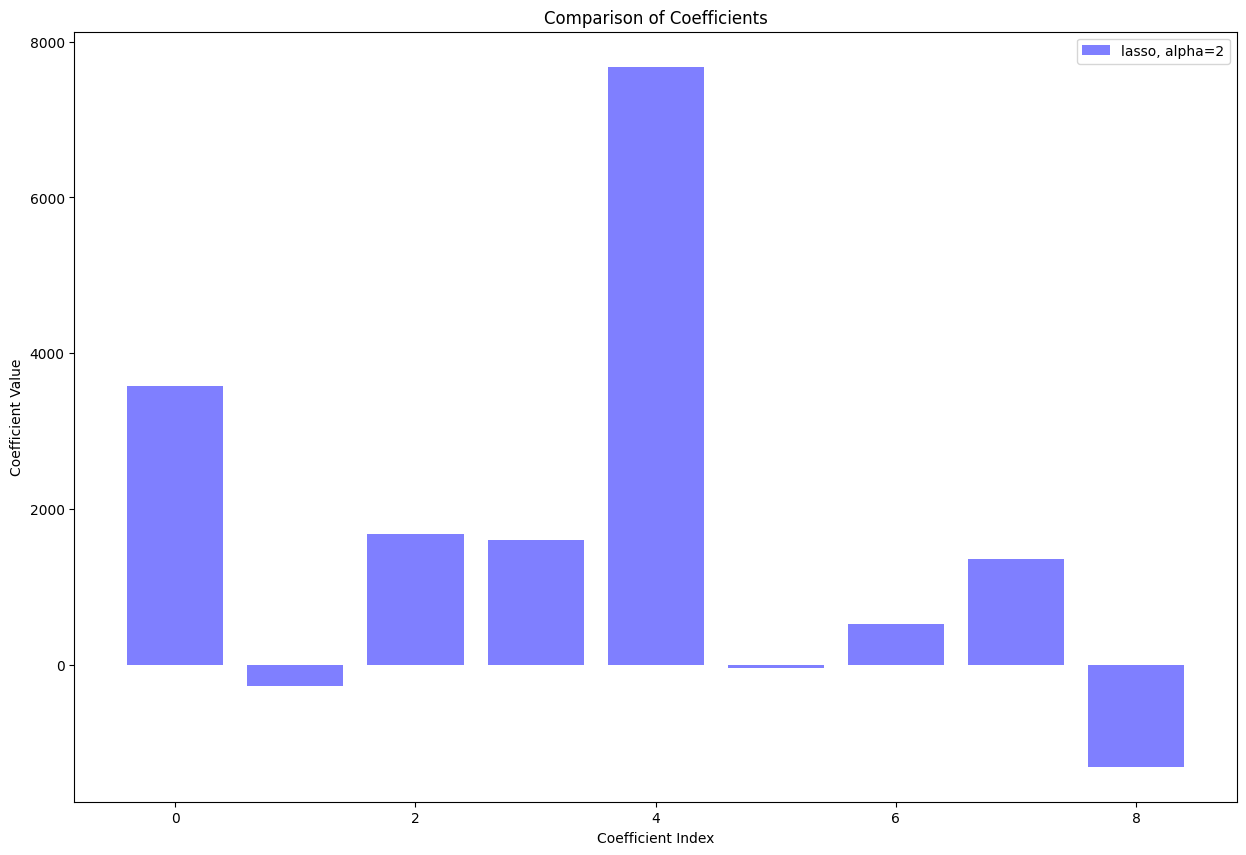

In [26]:
visualize_coef(lasso_lr, "lasso, alpha=0.5", "b")
visualize_coef(lasso_lr_low_alpha, "lasso, alpha=0.1", "b")
visualize_coef(lasso_lr_high_alpha, "lasso, alpha=2", "b")

## L2

In [27]:
Ridge_lr = Ridge(alpha=0.5)
Ridge_lr.fit(x_train, y_train)


Ridge_lr_low_alpha = Ridge(alpha=0.1)
Ridge_lr_low_alpha.fit(x_train, y_train)


Ridge_lr_high_alpha = Ridge(alpha=2)
Ridge_lr_high_alpha.fit(x_train, y_train)

Ridge(alpha=2)

Coefficients of the variables in the sklearn:  [ 3557.39876241  -267.02007622  1654.96503909  1598.3381172
  7630.62391039  -209.71058091   362.92826064  1199.6637055
 -1455.48120474]


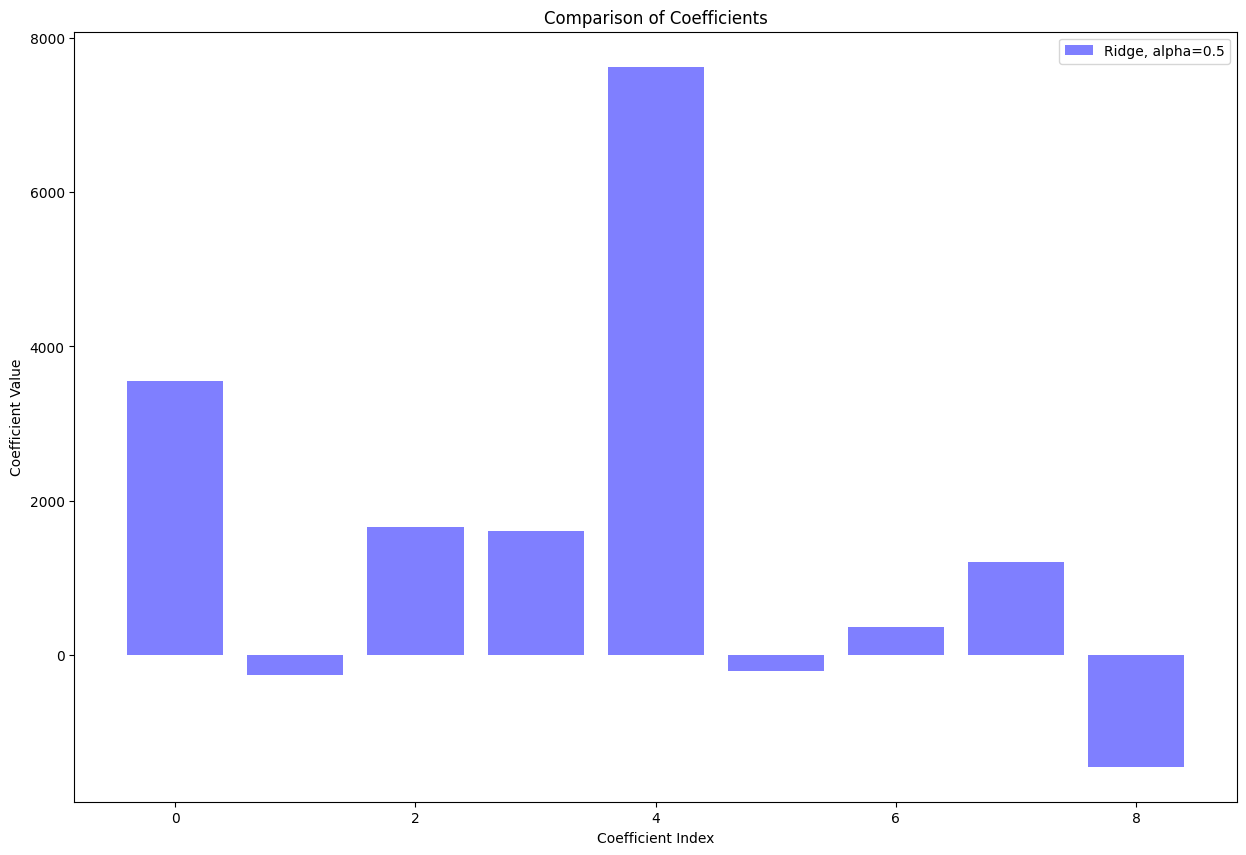

Coefficients of the variables in the sklearn:  [ 3573.68852071  -270.8548928   1669.16079355  1603.30637165
  7671.63918264  -210.88360233   368.70021909  1200.47591554
 -1461.04101601]


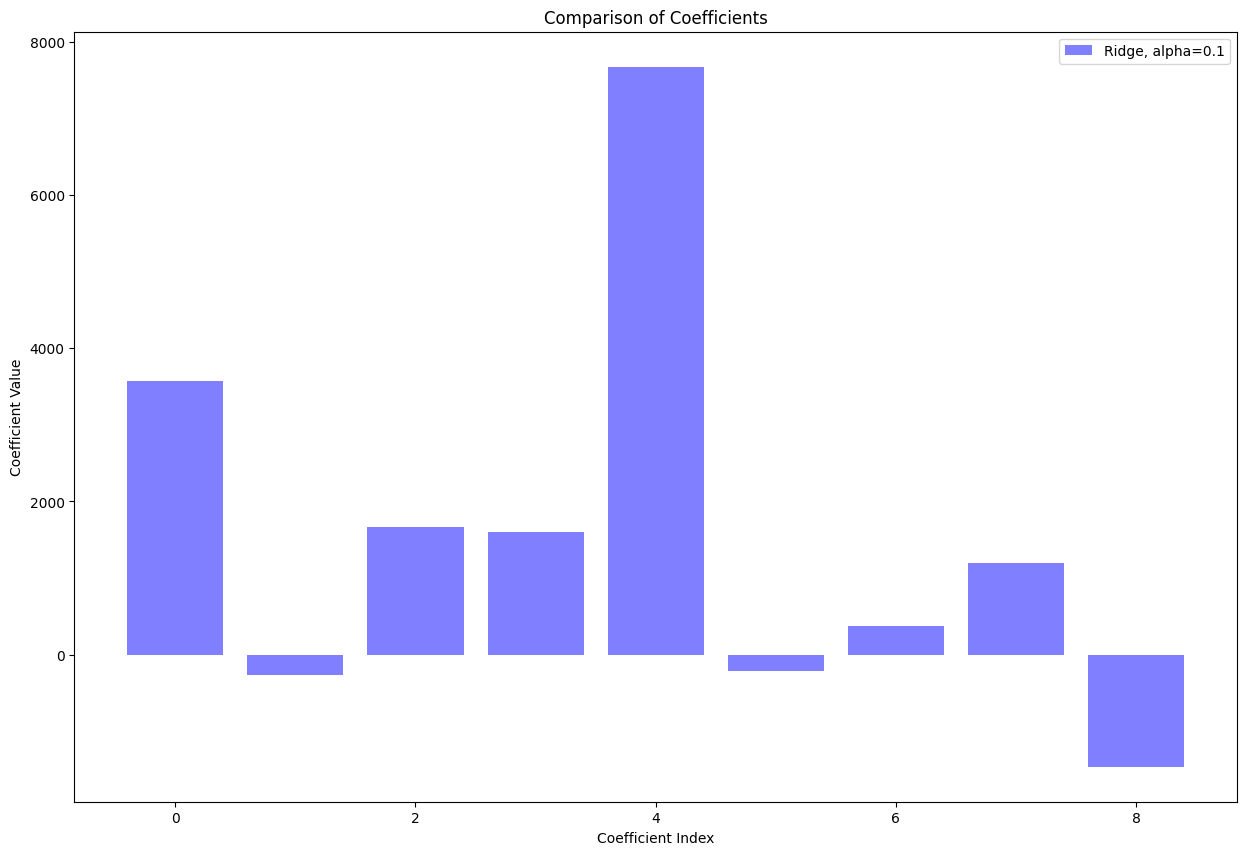

Coefficients of the variables in the sklearn:  [ 3497.60030783  -253.1158027   1603.56320022  1579.77488788
  7480.8685647   -205.4016317    342.13082739  1196.21727689
 -1434.97172155]


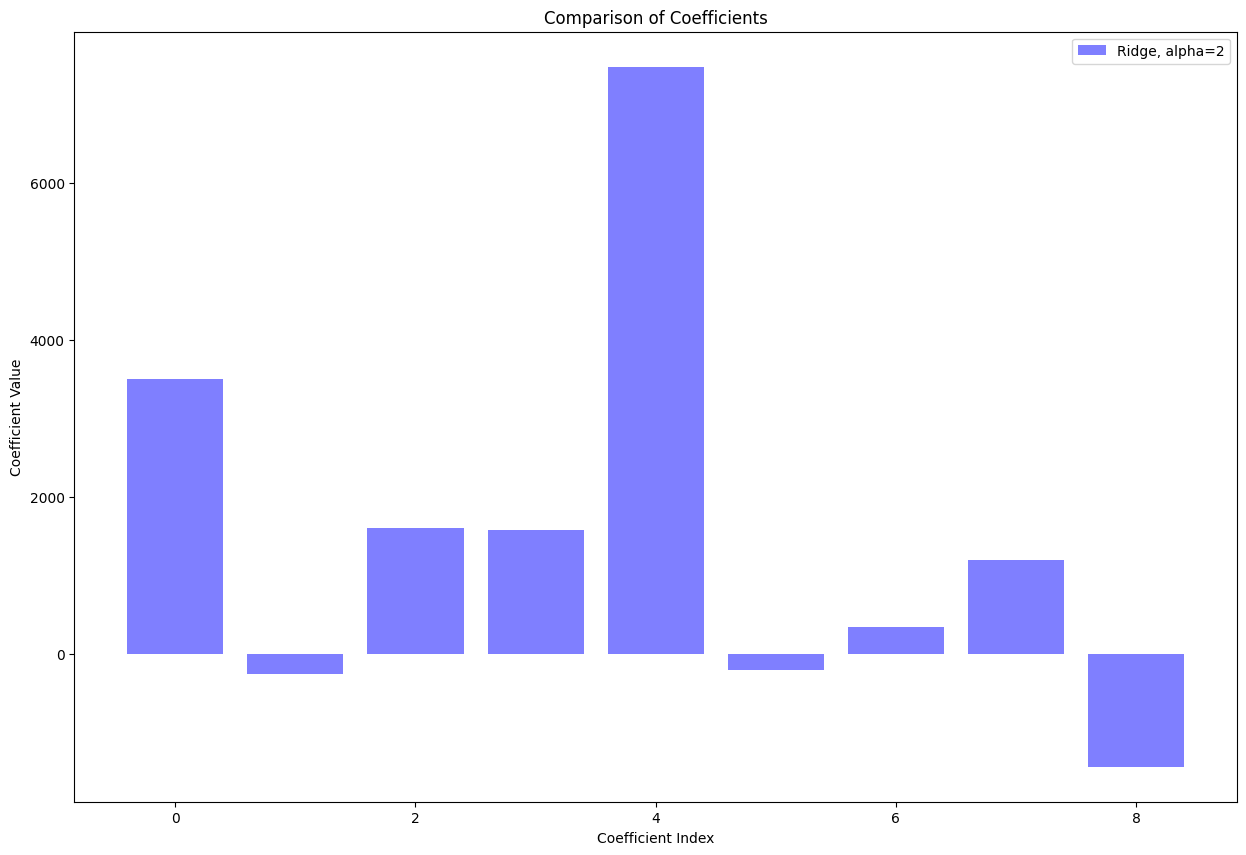

In [28]:
visualize_coef(Ridge_lr, "Ridge, alpha=0.5", "b")
visualize_coef(Ridge_lr_low_alpha, "Ridge, alpha=0.1", "b")
visualize_coef(Ridge_lr_high_alpha, "Ridge, alpha=2", "b")

In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 1.1402326267469463, 1: 1.1402483074946776, 10: 1.1404041955098718, 100: 1.1418767036320603}


In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 1.1402347065891507, 1: 1.1402691702269923, 10: 1.1406130815884936, 100: 1.1440520732974293}
